In [1]:
import os
import torch

import numpy as np
from sklearn.manifold import TSNE

from vae import VAE
import matplotlib.pyplot as plt

if not os.path.exists('figs'):
    os.mkdir('figs')

In [2]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

In [4]:
# MNISTデータセットのダウンロードとDataLoaderの設定
train_dataset = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='data', train=False, download=True, transform=transform)

# バッチサイズを設定
batch_size = 500

# DataLoaderの作成
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [5]:
model = VAE(x_dim=784, h_dim=200, z_dim=20)
model.learn(train_loader)

c:\Users\MIYOS\anaconda3\envs\py312-cuda\Lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


epoch:1, loss:115379.13077731093
epoch:2, loss:71381.85898109243
epoch:3, loss:62391.871848739494
epoch:4, loss:58233.469078256305
epoch:5, loss:55469.20890231092
epoch:6, loss:53571.0579372374
epoch:7, loss:52222.73568802521
epoch:8, loss:51256.5948332458
epoch:9, loss:50527.71444984244
epoch:10, loss:49926.555278361346
epoch:11, loss:49445.51792279412
epoch:12, loss:48997.80951286765
epoch:13, loss:48637.53650210084
epoch:14, loss:48257.02379858193
epoch:15, loss:47936.1864167542
epoch:16, loss:47665.290999212186
epoch:17, loss:47383.934480042015
epoch:18, loss:47152.28781512605
epoch:19, loss:46926.404838497896
epoch:20, loss:46705.04700630252
epoch:21, loss:46499.96819196428
epoch:22, loss:46335.05074842437
epoch:23, loss:46165.387736344535
epoch:24, loss:46014.070936186974
epoch:25, loss:45872.32612263656
epoch:26, loss:45720.152146796216
epoch:27, loss:45606.79946822479
epoch:28, loss:45494.66832983193
epoch:29, loss:45386.99123555672
epoch:30, loss:45287.54227941176


In [28]:
# バッチサイズを設定
batch_size = 60000
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

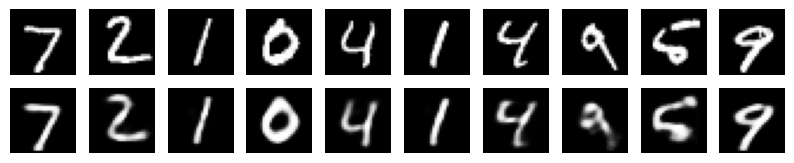

In [29]:
point = []
for i, ( batch_data, label ) in enumerate(test_loader):
    mu, logvar, z, xh = model.x_to_z_to_xh(batch_data)
    point.append(z.detach().cpu().numpy())
    if i == 0:
        break

plt.figure(figsize=(10, 10))
for j in range(10):
    plt.subplot(10, 10, j + 1)
    x = batch_data[j].view(-1, 28, 28).detach().cpu().numpy()
    plt.imshow(x.squeeze(), cmap='gray')
    plt.axis('off')

    plt.subplot(10, 10, j + 11)
    x = xh[j].view(-1, 28, 28).detach().cpu().numpy()
    plt.imshow(x.squeeze(), cmap='gray')
    plt.axis('off')

plt.savefig('./figs/xh.png')
plt.show()

In [30]:
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(np.array(point)[0])

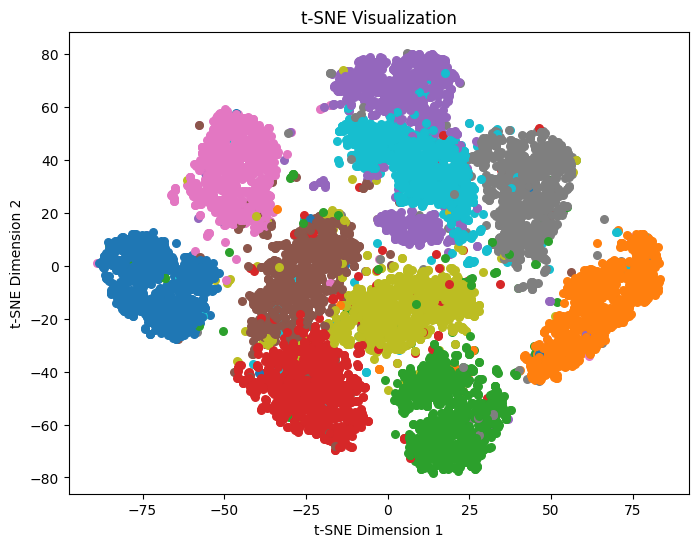

In [31]:
colors = [
    (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),   # 青
    (1.0, 0.4980392156862745, 0.054901960784313725),                 # オレンジ
    (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),  # 緑
    (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),   # 赤
    (0.5803921568627451, 0.403921568627451, 0.7411764705882353),     # 紫
    (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),  # 茶
    (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),    # ピンク
    (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),    # グレー
    (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),   # イエロー
    (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)     # シアン
]

plt.figure(figsize=(8, 6))
for i, (x,y) in enumerate(X_embedded):
    ci = colors[int(label[i].detach().cpu().numpy())]
    plt.scatter(x, y, color=ci, marker='o', s=30)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.savefig('./figs/z.png')
plt.show()